In [57]:
from jupyter_server.transutils import base_dir
!pip install openpyxl

In [4]:

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import shutil
from collections import OrderedDict
import subprocess
import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch
torch.set_num_threads(1)

import nnunetv2
import pandas as pd
import seaborn as sns

#import statsmodels.api as sm
#from statsmodels.stats.power import TTestIndPower
import csv
import re

In [51]:
tabular_data_WORC = pd.read_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Tabular_data.csv")

In [52]:
tabular_data_WORC.head()

,Subject,M/F,Hand,YOB,Notes,Age,Sex,Dataset,Diagnosis,Diagnosis_binary,Phenotype,MR Sessions,CT Sessions
0,CRLM-001,U,NaN,NaN,NaN,85,M,CRLM,rHGP,0,NaN,NaN,1.0
1,CRLM-002,U,NaN,NaN,NaN,49,F,CRLM,rHGP,0,NaN,NaN,1.0
2,CRLM-003,U,NaN,NaN,NaN,52,M,CRLM,dHGP,1,NaN,NaN,1.0
3,CRLM-004,U,NaN,NaN,NaN,75,F,CRLM,dHGP,1,NaN,NaN,1.0
4,CRLM-005,U,NaN,NaN,NaN,77,M,CRLM,dHGP,1,NaN,NaN,1.0


### WORC DATASET ANALYSIS

In [9]:
print(tabular_data_WORC["Dataset"].unique())

['CRLM' 'Desmoid' 'GIST' 'Lipo' 'Liver' 'Melanoma']


In [53]:
relevant_data_WORC = tabular_data_WORC[tabular_data_WORC["Dataset"].isin(["Lipo", "Desmoid"])].reset_index(drop=True)
relevant_data_WORC.head()

,Subject,M/F,Hand,YOB,Notes,Age,Sex,Dataset,Diagnosis,Diagnosis_binary,Phenotype,MR Sessions,CT Sessions
0,Desmoid-001,U,NaN,NaN,NaN,16,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
1,Desmoid-002,U,NaN,NaN,NaN,44,F,Desmoid,non-DTF,0,LeiomyoSarcomas,1.0,NaN
2,Desmoid-003,U,NaN,NaN,NaN,37,F,Desmoid,non-DTF,0,LeiomyoSarcomas,1.0,NaN
3,Desmoid-004,U,NaN,NaN,NaN,33,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
4,Desmoid-005,U,NaN,NaN,NaN,33,M,Desmoid,non-DTF,0,MyxofibroSarcomas,1.0,NaN


In [41]:
print(f"Number of Patients:{len(relevant_data_WORC)}")

Number of Patients:318


In [49]:
# Filter rows where Phenotype is NaN
nan_phenotype_data = relevant_data_WORC[relevant_data_WORC["Phenotype"].isnull()]

print(f"Number of not classified Phenotype instances: {relevant_data_WORC["Phenotype"].isnull().sum()}")
print(f"Number of not classified Diagnosis instances: {relevant_data_WORC["Diagnosis"].isnull().sum()}")


Number of not classified Phenotype instances: 187
Number of not classified Diagnosis instances: 0


In [48]:
print(nan_phenotype_data[["Subject","Diagnosis", "Phenotype"]])


         Subject Diagnosis Phenotype
5    Desmoid-006       DTF       NaN
13   Desmoid-014       DTF       NaN
15   Desmoid-016       DTF       NaN
16   Desmoid-017       DTF       NaN
21   Desmoid-022       DTF       NaN
..           ...       ...       ...
313     Lipo-111    Lipoma       NaN
314     Lipo-112     WDLPS       NaN
315     Lipo-113     WDLPS       NaN
316     Lipo-114    Lipoma       NaN
317     Lipo-115     WDLPS       NaN

[187 rows x 3 columns]


In [55]:
print(f"Diagnosis terms: {relevant_data_WORC["Diagnosis"].unique()}")
print(f"Phenotype terms: {relevant_data_WORC["Phenotype"].unique()}")


Diagnosis terms: ['non-DTF' 'DTF' 'WDLPS' 'Lipoma' 'WDLPS + Lipoma']
Phenotype terms: ['MyxoidlipoSarcoma' 'LeiomyoSarcomas' 'MyxofibroSarcomas ' nan]


In [52]:
relevant_data_WORC[relevant_data_WORC["Phenotype"] == "MyxoidlipoSarcoma"]

,Subject,M/F,Hand,YOB,Notes,Age,Sex,Dataset,Diagnosis,Diagnosis_binary,Phenotype,MR Sessions,CT Sessions
0,Desmoid-001,U,NaN,NaN,NaN,16,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
3,Desmoid-004,U,NaN,NaN,NaN,33,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
6,Desmoid-007,U,NaN,NaN,NaN,71,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
12,Desmoid-013,U,NaN,NaN,NaN,61,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
18,Desmoid-019,U,NaN,NaN,NaN,36,F,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
30,Desmoid-031,U,NaN,NaN,NaN,39,F,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
35,Desmoid-036,U,NaN,NaN,NaN,66,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
38,Desmoid-039,U,NaN,NaN,NaN,32,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
44,Desmoid-045,U,NaN,NaN,NaN,35,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN
45,Desmoid-046,U,NaN,NaN,NaN,40,F,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN


In [61]:
type_counts_phenotype = relevant_data_WORC['Phenotype'].value_counts()
print(type_counts_phenotype)

Phenotype
MyxofibroSarcomas     61
MyxoidlipoSarcoma     37
LeiomyoSarcomas       33
Name: count, dtype: int64


In [54]:
type_counts_diagnosis = relevant_data_WORC['Diagnosis'].value_counts()
print(type_counts_diagnosis)

Diagnosis
non-DTF           131
DTF                72
WDLPS              57
Lipoma             57
WDLPS + Lipoma      1
Name: count, dtype: int64


In [55]:
#Checking if this assumption holds
exceptions = relevant_data_WORC[
    ((relevant_data_WORC["Diagnosis"] != "non-DTF") & relevant_data_WORC["Phenotype"].notnull()) |
    ((relevant_data_WORC["Diagnosis"] == "non-DTF") & relevant_data_WORC["Phenotype"].isnull())
]

if not exceptions.empty:
    print("Rows that do not follow the rule:")
    print(exceptions)
else:
    print("assumption holds")

assumption holds


In [56]:
relevant_data_WORC["Final_Classification"] = relevant_data_WORC.apply(
    lambda row: row["Phenotype"] if row["Diagnosis"] == "non-DTF" else row["Diagnosis"], axis=1
)

# Display the first few rows to verify
print(relevant_data_WORC[["Diagnosis", "Phenotype", "Final_Classification"]].head(50))

   Diagnosis           Phenotype Final_Classification
0    non-DTF   MyxoidlipoSarcoma    MyxoidlipoSarcoma
1    non-DTF     LeiomyoSarcomas      LeiomyoSarcomas
2    non-DTF     LeiomyoSarcomas      LeiomyoSarcomas
3    non-DTF   MyxoidlipoSarcoma    MyxoidlipoSarcoma
4    non-DTF  MyxofibroSarcomas    MyxofibroSarcomas 
5        DTF                 NaN                  DTF
6    non-DTF   MyxoidlipoSarcoma    MyxoidlipoSarcoma
7    non-DTF  MyxofibroSarcomas    MyxofibroSarcomas 
8    non-DTF  MyxofibroSarcomas    MyxofibroSarcomas 
9    non-DTF     LeiomyoSarcomas      LeiomyoSarcomas
10   non-DTF  MyxofibroSarcomas    MyxofibroSarcomas 
11   non-DTF  MyxofibroSarcomas    MyxofibroSarcomas 
12   non-DTF   MyxoidlipoSarcoma    MyxoidlipoSarcoma
13       DTF                 NaN                  DTF
14   non-DTF     LeiomyoSarcomas      LeiomyoSarcomas
15       DTF                 NaN                  DTF
16       DTF                 NaN                  DTF
17   non-DTF  MyxofibroSarco

In [66]:
print(relevant_data_WORC['Final_Classification'].isna().sum())

0


In [57]:
type_counts_final_classification = relevant_data_WORC['Final_Classification'].value_counts()
print(f"Number of Patients: {len(relevant_data_WORC)}")
print("Number of instances per Subtype:")
print(type_counts_final_classification)

Number of Patients: 318
Number of instances per Subtype:
Final_Classification
DTF                   72
MyxofibroSarcomas     61
WDLPS                 57
Lipoma                57
MyxoidlipoSarcoma     37
LeiomyoSarcomas       33
WDLPS + Lipoma         1
Name: count, dtype: int64


In [72]:
relevant_data_WORC.columns

Index(['Subject', 'M/F', 'Hand', 'YOB', 'Notes', 'Age', 'Sex', 'Dataset',
       'Diagnosis', 'Diagnosis_binary', 'Phenotype', 'MR Sessions',
       'CT Sessions', 'Final_Classification'],
      dtype='object')

In [73]:
# Save to a new CSV file
relevant_data_WORC.to_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\WORC_tabular_processed", index=False)


### Rename Images and Move into Correct Folders

In [5]:
base_dir =r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data"
csv_file = r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\WORC_tabular_processed"


In [88]:
df = pd.read_csv(csv_file)
# Initialize new columns if they don't exist
if 'New_Image_Name' not in df.columns:
    df['New_Image_Name'] = None
if 'New_Mask_Name' not in df.columns:
    df['New_Mask_Name'] = None

In [117]:
def rename_images(data, start_index = 1):

    dataset_path = os.path.join(base_dir, data)
    patient_index = start_index
    for patient_folder in os.listdir(dataset_path):
        patient_path = os.path.join(dataset_path, patient_folder)

        if os.path.isdir(patient_path):
            new_patient_id = f"patient_{patient_index:04d}"
            print(f"old name: {patient_folder}")
            print(f"new name: {new_patient_id}")

            patient_id_without_mr = patient_folder.replace("_MR", "")
            row_idx = df[df['Subject'] == patient_id_without_mr].index

            # Look inside subdirectories for NIFTI files
            nifti_folder = os.path.join(patient_path, "1", "NIFTI")
            image_path = os.path.join(nifti_folder, "image.nii.gz")
            mask_path = os.path.join(nifti_folder, "segmentation.nii.gz")

            # Check if both files exist
            if os.path.exists(image_path) and os.path.exists(mask_path):
            # Define new file names for nnU-Net
                new_image_name = f"{new_patient_id}_0000.nii.gz"
                print(new_image_name)
                new_mask_name = f"{new_patient_id}.nii.gz"

                if len(row_idx) > 0:
                # Update the 'New_Image_Name' and 'New_Mask_Name' for the matching patient
                    df.loc[row_idx, 'New_Image_Name'] = new_image_name
                    df.loc[row_idx, 'New_Mask_Name'] = new_mask_name
                else:
                    print(f"No match found for {patient_folder}. Skipping.")
            else:
                print(f"{image_path} does not exist!")



        patient_index += 1
    print("CSV updated with new names!")








In [118]:
rename_images("Desmoid_data",start_index=1)
rename_images("Lipo_data",start_index=1001)


old name: Desmoid-001_MR
new name: patient_0001
patient_0001_0000.nii.gz
old name: Desmoid-002_MR
new name: patient_0002
patient_0002_0000.nii.gz
old name: Desmoid-003_MR
new name: patient_0003
patient_0003_0000.nii.gz
old name: Desmoid-004_MR
new name: patient_0004
patient_0004_0000.nii.gz
old name: Desmoid-005_MR
new name: patient_0005
patient_0005_0000.nii.gz
old name: Desmoid-006_MR
new name: patient_0006
patient_0006_0000.nii.gz
old name: Desmoid-007_MR
new name: patient_0007
patient_0007_0000.nii.gz
old name: Desmoid-008_MR
new name: patient_0008
patient_0008_0000.nii.gz
old name: Desmoid-009_MR
new name: patient_0009
patient_0009_0000.nii.gz
old name: Desmoid-010_MR
new name: patient_0010
patient_0010_0000.nii.gz
old name: Desmoid-011_MR
new name: patient_0011
patient_0011_0000.nii.gz
old name: Desmoid-012_MR
new name: patient_0012
patient_0012_0000.nii.gz
old name: Desmoid-013_MR
new name: patient_0013
patient_0013_0000.nii.gz
old name: Desmoid-014_MR
new name: patient_0014
pat

In [91]:
df.columns

Index(['Subject', 'M/F', 'Hand', 'YOB', 'Notes', 'Age', 'Sex', 'Dataset',
       'Diagnosis', 'Diagnosis_binary', 'Phenotype', 'MR Sessions',
       'CT Sessions', 'Final_Classification', 'New_Image_Name',
       'New_Mask_Name'],
      dtype='object')

In [121]:
df.to_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\WORC_tabular_processed1", index=False)

In [119]:
df[["Subject","New_Image_Name","New_Mask_Name"]].head(50)

,Subject,New_Image_Name,New_Mask_Name
0,Desmoid-001,patient_0001_0000.nii.gz,patient_0001.nii.gz
1,Desmoid-002,patient_0002_0000.nii.gz,patient_0002.nii.gz
2,Desmoid-003,patient_0003_0000.nii.gz,patient_0003.nii.gz
3,Desmoid-004,patient_0004_0000.nii.gz,patient_0004.nii.gz
4,Desmoid-005,patient_0005_0000.nii.gz,patient_0005.nii.gz
5,Desmoid-006,patient_0006_0000.nii.gz,patient_0006.nii.gz
6,Desmoid-007,patient_0007_0000.nii.gz,patient_0007.nii.gz
7,Desmoid-008,patient_0008_0000.nii.gz,patient_0008.nii.gz
8,Desmoid-009,patient_0009_0000.nii.gz,patient_0009.nii.gz
9,Desmoid-010,patient_0010_0000.nii.gz,patient_0010.nii.gz


In [124]:
def rename_and_move_images(df, data, base_dir, destination_dir):
    dataset_path = os.path.join(base_dir, data)
    patient_index = 1
    for patient_folder in os.listdir(dataset_path):
        patient_path = os.path.join(dataset_path, patient_folder)

        if os.path.isdir(patient_path):
            new_patient_id = f"patient_{patient_index:04d}"
            print(f"old name: {patient_folder}")
            print(f"new name: {new_patient_id}")

            patient_id_without_mr = patient_folder.replace("_MR", "")
            row_idx = df[df['Subject'] == patient_id_without_mr].index

            # Look inside subdirectories for NIFTI files
            nifti_folder = os.path.join(patient_path, "1", "NIFTI")
            image_path = os.path.join(nifti_folder, "image.nii.gz")
            mask_path = os.path.join(nifti_folder, "segmentation.nii.gz")

            # Check if both files exist
            if os.path.exists(image_path) and os.path.exists(mask_path):
            # Define new file names for nnU-Net
                new_image_name = f"{new_patient_id}_0000.nii.gz"
                print(new_image_name)
                new_mask_name = f"{new_patient_id}.nii.gz"


             # Define the destination paths where you want to move the files
                new_image_path = os.path.join(destination_dir, new_image_name)
                print(f"new image path: {new_image_path}")
                new_mask_path = os.path.join(destination_dir, new_mask_name)

                # Rename and move the files to the new location
                shutil.move(image_path, new_image_path)
                shutil.move(mask_path, new_mask_path)
            else:
                print(f"{image_path} does not exist!")



        patient_index += 1




In [125]:
destination = r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\nnUNet_raw\Dataset002_WORC"
rename_and_move_images(df, 'Lipo_data', base_dir, destination)
rename_and_move_images(df, 'Desmoid_data', base_dir, destination)

old name: Lipo-001_MR
new name: patient_0001
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-001_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-002_MR
new name: patient_0002
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-002_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-003_MR
new name: patient_0003
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-003_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-004_MR
new name: patient_0004
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-004_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-005_MR
new name: patient_0005
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-005_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-006_MR
new name: patient_0006
C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Lipo_data\Lipo-006_MR\1\NIFTI\image.nii.gz does not exist!
old name: Lipo-007_MR
new name: patient_0007
C

In [58]:
tabular_data_TCIA = pd.read_excel(r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\tabular_data.xlsx")

In [44]:
# Convert Series to DataFrame and reset index
type_counts = tabular_data_TCIA['MSKCC type'].value_counts()
type_counts = type_counts.reset_index()
type_counts.columns = ["Subtype", "Count"]  # Rename columns

# Sort values in descending order
type_counts = type_counts.sort_values(by="Count", ascending=False)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

C:\Users\paula\AppData\Local\Temp\ipykernel_23340\1089325559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Subtype", data=type_counts, palette="viridis")


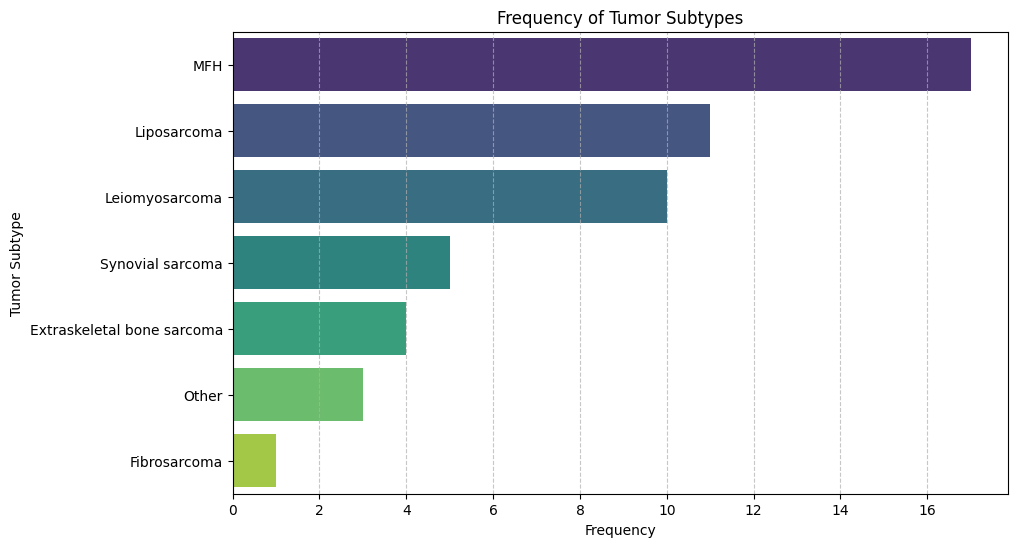

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Subtype", data=type_counts, palette="viridis")

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Tumor Subtype")
plt.title("Frequency of Tumor Subtypes")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [40]:
#encode cat variable into numerical, one hot encode
tabular_data_encoded = pd.get_dummies(tabular_data[['Histological type', 'Site of primary STS']])

correlation = tabular_data_encoded.corr().iloc[0, 1]  #
print("Correlation:", correlation)

Correlation: 0.36345384101630057


In [39]:
tabular_data['Histological type'].corr(tabular_data['Site of primary STS'])

np.float64(0.3634538410163007)

In [43]:
#I am assuming a medium effect size, but this needs to be checked!
#alpha: significance level
#power: prob of detecting a true effect
#for effect size = 0.5, sample size is 63.77
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size=0.5, alpha=0.05, power=0.8, alternative='two-sided')
print(required_sample_size)

63.765610587854006


In [45]:
base_path = "C:\\Users\\paula\\PycharmProjects\\STT_classification\\Segmentation\\nnUNetFrame\\RawData\\PublicData\\Soft-tissue-Sarcoma"

output_csv = "filename_mapping.csv"


In [136]:
def create_filename_mapping(patient):
    #print(patient)
    mappings = [] #patient, original filename, new filename
    #root is patient dir
    patient_dir = os.path.join(base_path, patient)
    for root, dirs, files in os.walk(patient_dir):
        #print(root)
        mr_dirs = []
        for dir in dirs:
            #print(f"Checking dir: {dir}")
            match = re.match(r'\d+\.\d+-([A-Za-z0-9\s]+?)(?:\s*- RESEARCH)?-\d+', dir)
            if match:
                print(match.group(1))

                # Extract the MR type part
                full_path = os.path.join(root, dir)
                print(full_path)
                mr_dirs.append((match.group(1), full_path))
                #print(match.group(1))
                #mappings.append((patient,match.group(1),dir))
        # Ensure T1 is first, other image second
        mr_dirs.sort(key=lambda x: ("T1" not in x[0], x[0]))

        for idx, (mr_type, orig_mr_dir) in enumerate(mr_dirs):
            new_mr_dir = f"{patient}_{idx:04d}"
            if idx == 0:
                T1 = 1
            else:
                T1 = 0
            mappings.append([patient,mr_type, orig_mr_dir, T1, new_mr_dir])

    return mappings



In [120]:
patient_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
print(patient_list)


['STS_001', 'STS_002', 'STS_003', 'STS_004', 'STS_005', 'STS_006', 'STS_007', 'STS_008', 'STS_009', 'STS_010', 'STS_011', 'STS_012', 'STS_013', 'STS_014', 'STS_015', 'STS_016', 'STS_017', 'STS_018', 'STS_019', 'STS_020', 'STS_021', 'STS_022', 'STS_023', 'STS_024', 'STS_025', 'STS_026', 'STS_027', 'STS_028', 'STS_029']


In [137]:
mappings =[]
csv_path = os.path.join(base_path, output_csv)
with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Patient ID", "Original MR Dir", "Subtype", "T1", "New MR Dir"])
    for patient in patient_list:
        patient_mapping = create_filename_mapping(patient)
        writer.writerows(patient_mapping)


In [132]:
file_mapping = pd.read_csv(csv_path)
x = file_mapping[["Patient ID", "T1", "New MR Dir"]]
x.head()

,Patient ID,T1,New MR Dir


In [133]:
file_mapping.head()

,Patient ID,Original MR Dir,Subtype,T1,New MR Dir


In [104]:
def rename_images(csv_file, base_path, target_dir):

    reader = csv.reader(csv_file)
    header = next(csv_file)

    for row in reader:
            patient = row[0]   # Patient name (e.g., STS_001)
            original_dir = row[1]  # Original MR directory name
            new_dir = row[3]

            patient_dir = os.path.join(base_path, patient)

            # Walk through the patient directory and subdirectories
            for root, dirs, files in os.walk(patient_dir):
                if original_dir in dirs:  # Check if the directory exists
                    original_path = os.path.join(root, original_dir)
                    new_path = os.path.join(root, new_dir)

                    # Rename and move
                    print(f"Renaming {original_path} to {new_path}")
                    os.rename(original_path, new_path)

                    # Now move the renamed directory to the new target directory
                    print(f"Moving {new_path} to {target_dir}")
                    shutil.move(new_path, os.path.join(target_dir, new_dir))
                    break  # Once the directory is found, stop further searching

                else:
                    print(f"Warning: {original_dir} not found in {root}, skipping.")

In [105]:
target_directory = "C:\\Users\\paula\\PycharmProjects\\STT_classification\\Segmentation\\nnUNetFrame\\RawData\\PublicData"

with open(csv_path, mode="r") as file:
    rename_images(file, base_path, target_directory)

Renaming C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\11.000000-AXIAL SE T1 - RESEARCH-12555 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0000
Moving C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0000 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData
Renaming C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\10.000000-AXIAL SE T2 FAT SAT - RESEARCH-62438 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0001
Moving 

## Stratified(ish) Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split
csv_path = r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\WORC_tabular_processed1"

In [8]:
df = pd.read_csv(csv_path)

In [9]:
#Dropping WDLPS + Lipoma case, as there is only one instance of that
df = df[df["Final_Classification"] != "WDLPS + Lipoma"]

In [10]:
df.head()

,Subject,M/F,Hand,YOB,Notes,Age,Sex,Dataset,Diagnosis,Diagnosis_binary,Phenotype,MR Sessions,CT Sessions,Final_Classification,New_Image_Name,New_Mask_Name
0,Desmoid-001,U,NaN,NaN,NaN,16,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN,MyxoidlipoSarcoma,patient_0001_0000.nii.gz,patient_0001.nii.gz
1,Desmoid-002,U,NaN,NaN,NaN,44,F,Desmoid,non-DTF,0,LeiomyoSarcomas,1.0,NaN,LeiomyoSarcomas,patient_0002_0000.nii.gz,patient_0002.nii.gz
2,Desmoid-003,U,NaN,NaN,NaN,37,F,Desmoid,non-DTF,0,LeiomyoSarcomas,1.0,NaN,LeiomyoSarcomas,patient_0003_0000.nii.gz,patient_0003.nii.gz
3,Desmoid-004,U,NaN,NaN,NaN,33,M,Desmoid,non-DTF,0,MyxoidlipoSarcoma,1.0,NaN,MyxoidlipoSarcoma,patient_0004_0000.nii.gz,patient_0004.nii.gz
4,Desmoid-005,U,NaN,NaN,NaN,33,M,Desmoid,non-DTF,0,MyxofibroSarcomas,1.0,NaN,MyxofibroSarcomas,patient_0005_0000.nii.gz,patient_0005.nii.gz


In [12]:
source_dir = r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\nnUNet_raw\Dataset002_WORC"

In [14]:
imagesTr_dir = os.path.join(source_dir, "imagesTr")
imagesTs_dir = os.path.join(source_dir, "imagesTs")
labelsTr_dir = os.path.join(source_dir, "labelsTr")
labelsTs_dir = os.path.join(source_dir, "labelsTs")

for dir_path in [imagesTr_dir, imagesTs_dir, labelsTr_dir, labelsTs_dir]:
    os.makedirs(dir_path, exist_ok=True)

In [15]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["Final_Classification"], random_state=42)

In [35]:
print("Subtype distribution Training set")
Train_counts = train_df["Final_Classification"].value_counts()
Train_counts = Train_counts.reset_index()
Train_counts.columns = ["Subtype", "Count-Train"]
Train_counts["Percentage-Train"]= (Train_counts["Count-Train"]/len(train_df)).round(3)

Train_counts.head()


Subtype distribution Training set


,Subtype,Count-Train,Percentage-Train
0,DTF,57,0.225
1,MyxofibroSarcomas,49,0.194
2,WDLPS,46,0.182
3,Lipoma,45,0.178
4,MyxoidlipoSarcoma,30,0.119


In [58]:
print("Subtype distribution Test set")
Test_counts = test_df["Final_Classification"].value_counts()
Test_counts = Test_counts.reset_index()
Test_counts.columns = ["Subtype", "Count-Test"]
Test_counts["Percentage-Test"]= (Test_counts["Count-Test"]/len(test_df)).round(3)

Counts =pd.merge(Train_counts, Test_counts, on="Subtype", how= "inner")

Counts.head()

Subtype distribution Test set


,Subtype,Count-Train,Percentage-Train,Count-Test,Percentage-Test
0,DTF,57,0.225,15,0.234
1,MyxofibroSarcomas,49,0.194,12,0.188
2,WDLPS,46,0.182,11,0.172
3,Lipoma,45,0.178,12,0.188
4,MyxoidlipoSarcoma,30,0.119,7,0.109


In [40]:
Counts.to_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\Train_Test_Split.csv", index=False)

In [41]:
def move_files_nnunet(df_subset, image_dest,label_dest):
     for _, row in df_subset.iterrows():
        image_src = os.path.join(source_dir, row["New_Image_Name"])
        label_src = os.path.join(source_dir, row["New_Mask_Name"])

        if os.path.exists(image_src) and os.path.exists(label_src):
            shutil.move(image_src, os.path.join(image_dest, row["New_Image_Name"]))
            shutil.move(label_src, os.path.join(label_dest, row["New_Mask_Name"]))
        else:
            print(f"Missing files for {row['New_Image_Name']}, skipping.")

In [42]:
move_files_nnunet(train_df, imagesTr_dir, labelsTr_dir)
move_files_nnunet(test_df, imagesTs_dir, labelsTs_dir)

# Save train-test split CSVs for tracking
train_df.to_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\train_split.csv", index=False)
test_df.to_csv(r"C:\Users\paula\Documents\Thesis\Segmentation\WORC_data\test_split.csv", index=False)

print("Data successfully split and moved!")


Missing files for patient_1112_0000.nii.gz, skipping.
Missing files for patient_1088_0000.nii.gz, skipping.
Missing files for patient_1038_0000.nii.gz, skipping.
Missing files for patient_1094_0000.nii.gz, skipping.
Missing files for patient_1111_0000.nii.gz, skipping.
Missing files for patient_1110_0000.nii.gz, skipping.
Missing files for patient_1092_0000.nii.gz, skipping.
Missing files for patient_1034_0000.nii.gz, skipping.
Missing files for patient_1054_0000.nii.gz, skipping.
Missing files for patient_1051_0000.nii.gz, skipping.
Missing files for patient_1096_0000.nii.gz, skipping.
Missing files for patient_1044_0000.nii.gz, skipping.
Missing files for patient_1108_0000.nii.gz, skipping.
Missing files for patient_1113_0000.nii.gz, skipping.
Missing files for patient_1100_0000.nii.gz, skipping.
Missing files for patient_1043_0000.nii.gz, skipping.
Missing files for patient_1069_0000.nii.gz, skipping.
Missing files for patient_1013_0000.nii.gz, skipping.
Missing files for patient_10

In [47]:
example = r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\nnUNet_raw\Dataset002_WORC\labelsTr\patient_0010.nii.gz"
train_label = np.array(nib.load(example).dataobj)
print("Label unique values:", np.unique(train_label))

Label unique values: [0 1]


## Creating json file

In [48]:
"""Creating the dataset.json file for data and pipeline fingerprint"""
def create_json(train_image_dir, test_image_dir):
    overwrite_json_file = False  # make it True if you want to overwrite the dataset.json file in Dataset_folder
    json_file_exist = False

    if os.path.exists(os.path.join(source_dir, 'dataset.json')):
        print('dataset.json already exist!')
        json_file_exist = True

    if json_file_exist == False or overwrite_json_file:

        json_dict = OrderedDict()
        json_dict['name'] = "Soft_tissue_tumours WORC"
        json_dict['description'] = "Soft Tissue Segmentation WORC"
        json_dict['tensorImageSize'] = "3D"
        #json_dict['reference'] = "see challenge website"
        #json_dict['licence'] = "see challenge website"
        #json_dict['release'] = "0.0"

        # you may mention more than one modality
        json_dict['channel_names'] = {
            "0": "MRI"
        }

        # set expected file ending
        json_dict["file_ending"] = ".nii.gz"

        # label names should be mentioned for all the labels in the dataset
        json_dict['labels'] = {
            "background": 0,
            "tumour": 1
        }

        train_ids = os.listdir(train_image_dir)
        test_ids = os.listdir(test_image_dir)
        json_dict['numTraining'] = len(train_ids)
        json_dict['numTest'] = len(test_ids)

        with open(os.path.join(source_dir, "dataset.json"), 'w') as f:
            json.dump(json_dict, f, indent=4, sort_keys=True)

        if os.path.exists(os.path.join(source_dir, 'dataset.json')):
            if json_file_exist == False:
                print('dataset.json created!')
            else:
                print('dataset.json overwritten!')


In [49]:
create_json(imagesTr_dir,imagesTr_dir)

dataset.json created!
